# REGRESSION From Scratch With BOSTON HOUSE PRICE PREDICTION

In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot
from plotnine import ggplot, aes, geom_line,geom_point,geom_histogram
import warnings
warnings.filterwarnings('ignore')
# Importing of Useful libraries from sklearn library.
from sklearn.preprocessing import StandardScaler   # For Scaling the dataset
from sklearn.model_selection import train_test_split    # For Splitting the dataset
from sklearn.linear_model import LinearRegression      # For Linear regression
from xgboost import XGBRegressor


from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.decomposition import PCA
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


In [40]:
# Importing the dataset.
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', delim_whitespace=True, names=names)

In [41]:
display(df.head())
print(df.shape)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


(506, 14)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


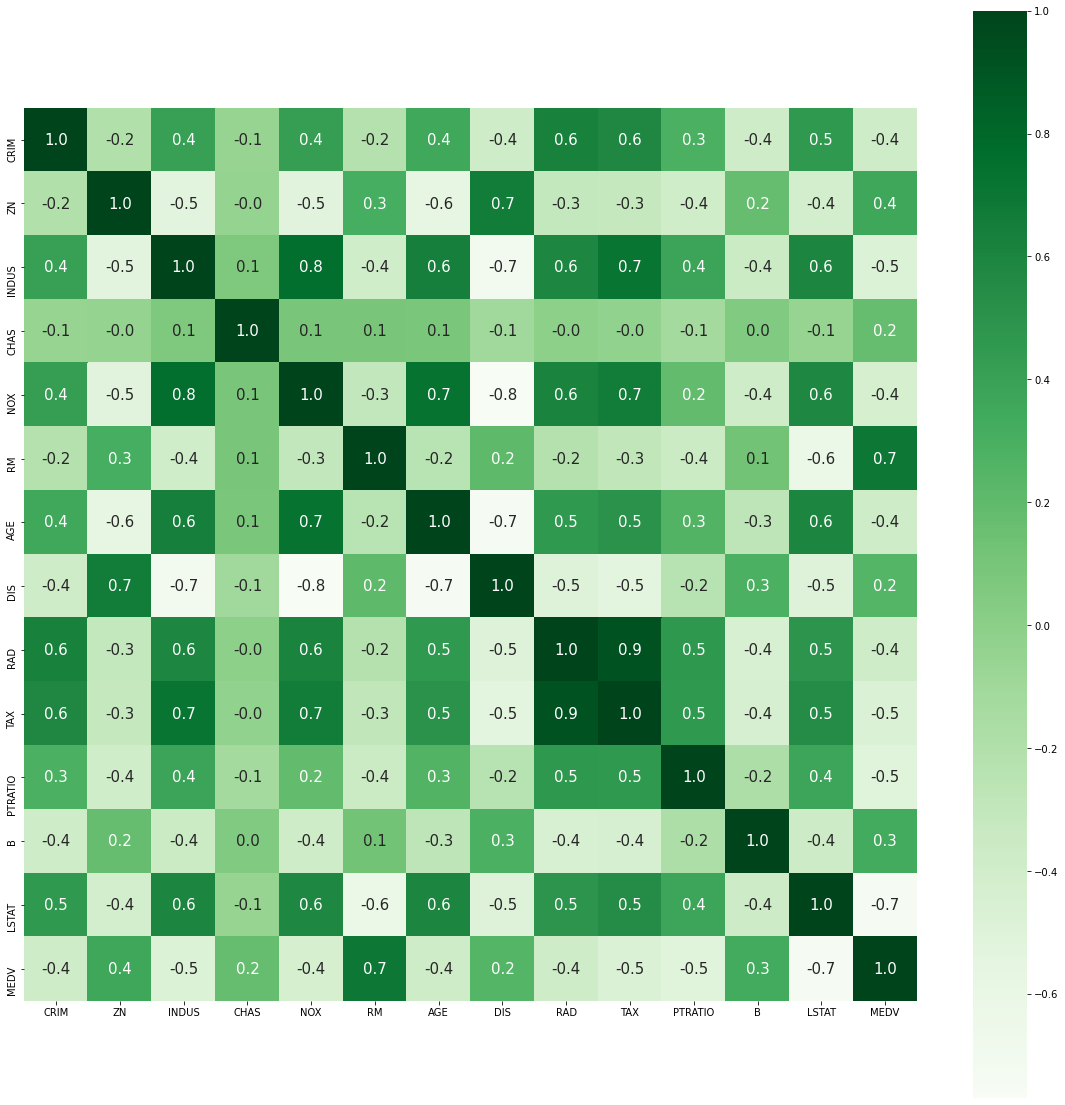

In [43]:
# Plotting the heatmap of correlation between features
# Finding out the correlation between the features
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

# ggplot2 style plotting

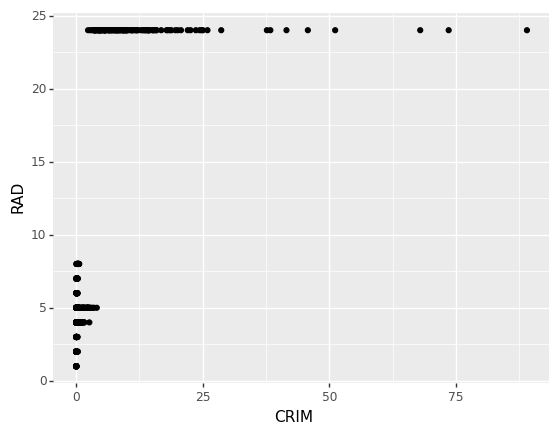

<ggplot: (166205154633)>

In [44]:
ggplot(df , aes(x = df['CRIM'] , y = df['RAD'])) +geom_point()

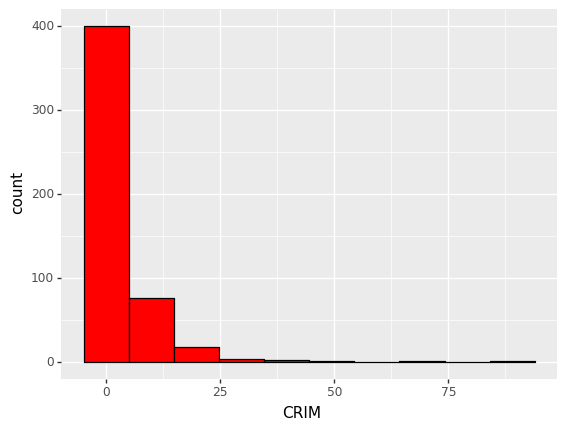

<ggplot: (166205157386)>

In [50]:
ggplot(df , aes(x = df['CRIM'])) +geom_histogram(colour = "black" , fill = "red" , bins = 10) 

In [14]:
# Let us Create Feature matrix and Target Vector.
x_train = df.iloc[:,:-1].values
y_train = df.iloc[:,-1].values

In [15]:
test_size=0.3
X_train,X_test,y_train,y_test=train_test_split(x_train,y_train,test_size=test_size,random_state=12)

#### Scaling of Feature matrix.

In [16]:
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)

In [17]:

pca = PCA(n_components=None)
x_train = pca.fit_transform(x_train)

explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661,
       0.05056978, 0.04118124, 0.03046902, 0.02130333, 0.01694137,
       0.0143088 , 0.01302331, 0.00488533])

In [18]:
print(f"The sum of initial 5 values is \t {0.47+0.11+0.09+0.06+0.06} , which is very good." )
print("So we will choose 5 number of features and reduce our training feature matrix to 5 features/columns. ")


The sum of initial 5 values is 	 0.79 , which is very good.
So we will choose 5 number of features and reduce our training feature matrix to 5 features/columns. 


In [19]:
pca = PCA(n_components=5)
x_train = pca.fit_transform(x_train)

In [20]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
# Model prediction on train data

y_pred = reg.predict(X_train)

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

RMSE: 0.01156838856617691


In [22]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)

R^2: 0.8460212351340756


In [23]:

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
# Value of y intercept
lm.intercept_

33.18145463026166

In [25]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [26]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)


R^2: 0.7087669275596409


In [27]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

RMSE: 4.5624434924610995


In [28]:


# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [30]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)

R^2: 0.8595249428629748


In [31]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

RMSE: 1.1437549740560535


In [32]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100,]})
      
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,85.952494
2,XGBoost,84.602124
0,Linear Regression,70.876693
